In [ ]:
!unzip data.zip -d ./data

Archive:  data.zip
   creating: ./data/test/
   creating: ./data/test/ad/
  inflating: ./data/test/ad/ad_test_1.jpg  
  inflating: ./data/test/ad/ad_test_10.jpg  
  inflating: ./data/test/ad/ad_test_11.jpg  
  inflating: ./data/test/ad/ad_test_12.jpg  
  inflating: ./data/test/ad/ad_test_13.jpg  
  inflating: ./data/test/ad/ad_test_14.jpg  
  inflating: ./data/test/ad/ad_test_15.jpg  
  inflating: ./data/test/ad/ad_test_16.jpg  
  inflating: ./data/test/ad/ad_test_17.jpg  
  inflating: ./data/test/ad/ad_test_18.jpg  
  inflating: ./data/test/ad/ad_test_19.jpg  
  inflating: ./data/test/ad/ad_test_2.jpg  
  inflating: ./data/test/ad/ad_test_20.jpg  
  inflating: ./data/test/ad/ad_test_21.jpg  
  inflating: ./data/test/ad/ad_test_22.jpg  
  inflating: ./data/test/ad/ad_test_23.jpg  
  inflating: ./data/test/ad/ad_test_24.jpg  
  inflating: ./data/test/ad/ad_test_25.jpg  
  inflating: ./data/test/ad/ad_test_26.jpg  
  inflating: ./data/test/ad/ad_test_27.jpg  
  inflating: ./data/test/ad/

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1)

train_generator = train_datagen.flow_from_directory('./data/train',
                                                    target_size=(150, 150),
                                                    batch_size = 5,
                                                    class_mode='binary')

Found 160 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory('./data/test',
                                                    target_size=(150, 150),
                                                    batch_size = 5,
                                                    class_mode='binary')

Found 120 images belonging to 2 classes.


In [ ]:
#모델생성
model = Sequential()
model.add(Conv2D(32,(3,3), input_shape=(150, 150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [ ]:
from IPython.core import history
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(
    train_generator,
    epochs=100,
    validation_data=test_generator,
    validation_steps=10,
    callbacks=[early_stopping_callback])

Epoch 1/100
32/32 [==============================] - 3s 38ms/step - loss: 0.6800 - accuracy: 0.5938 - val_loss: 0.6934 - val_accuracy: 0.4800
Epoch 2/100
32/32 [==============================] - 1s 34ms/step - loss: 0.6532 - accuracy: 0.6125 - val_loss: 0.6346 - val_accuracy: 0.6800
Epoch 3/100
32/32 [==============================] - 1s 46ms/step - loss: 0.6527 - accuracy: 0.6812 - val_loss: 0.6179 - val_accuracy: 0.6400
Epoch 4/100
32/32 [==============================] - 1s 33ms/step - loss: 0.6212 - accuracy: 0.6687 - val_loss: 0.5445 - val_accuracy: 0.8000
Epoch 5/100
32/32 [==============================] - 1s 45ms/step - loss: 0.5779 - accuracy: 0.7188 - val_loss: 0.4968 - val_accuracy: 0.7800
Epoch 6/100
32/32 [==============================] - 1s 35ms/step - loss: 0.5591 - accuracy: 0.7250 - val_loss: 0.5507 - val_accuracy: 0.7000
Epoch 7/100
32/32 [==============================] - 1s 35ms/step - loss: 0.5421 - accuracy: 0.7437 - val_loss: 0.6777 - val_accuracy: 0.5600
Epoch 

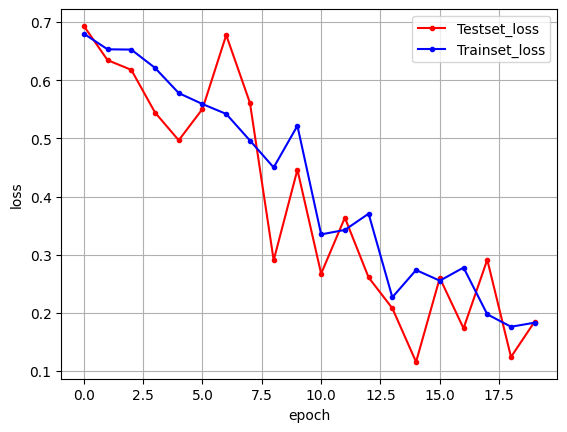

In [ ]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
#전이학습으로 모델 성능 극대화 하기
#사전 훈련된 모델을 가지고 와서 미세 조정을 하여 나의 프로젝트에 사용하는 방법
#ResNet50 모델 사용
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet') #트레이닝 된 모델 사용

img_path = 'dog.jpg'
img = image.load_img(img_path, target_size=(224, 224)) # 영상 크기를 변경하고 적재한다.
x = image.img_to_array(img) # 영상을 넘파이 배열로 변환한다.
x = np.expand_dims(x, axis=0) # 차원을 하나 늘인다. 배치 크기가 필요하다.
x = preprocess_input(x) # ResNet50이 요구하는 전처리를 한다.

preds = model.predict(x)
print('예측:', decode_predictions(preds, top=3)[0])

35363/35363 [==============================] - 0s 0us/step
예측: [('n02111889', 'Samoyed', 0.9553376), ('n02114548', 'white_wolf', 0.01817028), ('n02112018', 'Pomeranian', 0.009937643)]


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Input, models, layers, optimizers, metrics
from tensorflow.keras.layers import Dense, Flatten, Activation, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1)

train_generator = train_datagen.flow_from_directory('./data/train',
                                                    target_size=(150, 150),
                                                    batch_size = 5,
                                                    class_mode='binary')

Found 160 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory('./data/test',
                                                    target_size=(150, 150),
                                                    batch_size = 5,
                                                    class_mode='binary')

Found 120 images belonging to 2 classes.


In [ ]:
#vgg16모델 가지고 오기
transfer_model = VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))
transfer_model.trainabke = False

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
#모델 설정
finetune_model = models.Sequential()
finetune_model.add(transfer_model)
finetune_model.add(Flatten())
finetune_model.add(Dense(64))
finetune_model.add(Activation('relu'))
finetune_model.add(Dropout(0.5))
finetune_model.add(Dense(1))
finetune_model.add(Activation('sigmoid'))
finetune_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                524352    
                                                                 
 activation_9 (Activation)   (None, 64)                0         
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
 activation_10 (Activation)  (None, 1)                

In [ ]:
finetune_model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

history = finetune_model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator,
    validation_steps=10,
    callbacks=[early_stopping_callback])

Epoch 1/20
32/32 [==============================] - 8s 89ms/step - loss: 0.6932 - accuracy: 0.4313 - val_loss: 0.6933 - val_accuracy: 0.3800
Epoch 2/20
32/32 [==============================] - 2s 63ms/step - loss: 0.6932 - accuracy: 0.4625 - val_loss: 0.6932 - val_accuracy: 0.4200
Epoch 3/20
32/32 [==============================] - 2s 64ms/step - loss: 0.6931 - accuracy: 0.5250 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/20
32/32 [==============================] - 2s 67ms/step - loss: 0.6932 - accuracy: 0.5125 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/20
32/32 [==============================] - 2s 68ms/step - loss: 0.6933 - accuracy: 0.4437 - val_loss: 0.6931 - val_accuracy: 0.5400
Epoch 6/20
32/32 [==============================] - 2s 75ms/step - loss: 0.6931 - accuracy: 0.5188 - val_loss: 0.6931 - val_accuracy: 0.5200
Epoch 7/20
32/32 [==============================] - 2s 68ms/step - loss: 0.6932 - accuracy: 0.4875 - val_loss: 0.6932 - val_accuracy: 0.4800
Epoch 8/20
32

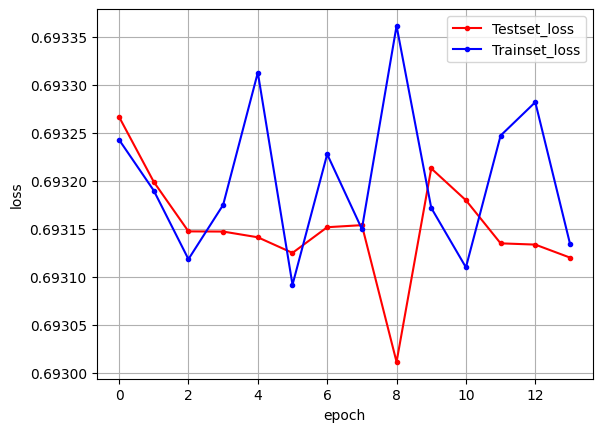

In [ ]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()